# SWIGGY SALES ANALYSIS

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Import Data

In [10]:
df = pd.read_excel("D:/Swiggy Python/swiggy_data.xlsx")


In [51]:
df.head()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count,Year,Month,Month_Number,Weekday,Quarter,Rating_Category,Price_Category,DayName
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0,2025,June,6,Sunday,2,Medium,Low Cost,Sunday
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25,2025,April,4,Thursday,2,High,Low Cost,Thursday
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48,2025,January,1,Wednesday,1,High,Low Cost,Wednesday
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65,2025,April,4,Thursday,2,High,Low Cost,Thursday
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0,2025,March,3,Thursday,1,Medium,Low Cost,Thursday


In [9]:
df.tail()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
197425,Sikkim,Gangtok,2025-01-25,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,4.4,0
197426,Sikkim,Gangtok,2025-07-02,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,4.4,0
197427,Sikkim,Gangtok,2025-03-25,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,4.4,0
197428,Sikkim,Gangtok,2025-03-26,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,4.4,0
197429,Sikkim,Gangtok,2025-03-27,Mama's Kitchen,Gangtok,Momos,Soya Momo,100.0,4.4,0


### Metadata

In [14]:
print("Number of Rows:",df.shape[0])

Number of Rows: 197430


In [16]:
print("Number of Fields:",df.shape[1])

Number of Fields: 10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   State            197430 non-null  object        
 1   City             197430 non-null  object        
 2   Order Date       197430 non-null  datetime64[ns]
 3   Restaurant Name  197430 non-null  object        
 4   Location         197430 non-null  object        
 5   Category         197430 non-null  object        
 6   Dish Name        197430 non-null  object        
 7   Price (INR)      197430 non-null  float64       
 8   Rating           197430 non-null  float64       
 9   Rating Count     197430 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 15.1+ MB


#### Check Missing Values

In [19]:
df.isnull().sum()

State              0
City               0
Order Date         0
Restaurant Name    0
Location           0
Category           0
Dish Name          0
Price (INR)        0
Rating             0
Rating Count       0
dtype: int64

#### Remove Duplicates

In [18]:
df.drop_duplicates(inplace=True)

#### Fix Data Types

In [20]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

df["Price (INR)"] = pd.to_numeric(df["Price (INR)"], errors="coerce")

#### Remove Invalid Rows

In [21]:
df = df[df["Price (INR)"] > 0]

## Data Types

In [18]:
df.dtypes

State                      object
City                       object
Order Date         datetime64[ns]
Restaurant Name            object
Location                   object
Category                   object
Dish Name                  object
Price (INR)               float64
Rating                    float64
Rating Count                int64
dtype: object

In [19]:
df.describe()

,Order Date,Price (INR),Rating,Rating Count
count,197430,197430.000000,197430.000000,197430.000000
mean,2025-05-01 19:41:20.996808960,268.512920,4.341582,28.321805
min,2025-01-01 00:00:00,0.950000,1.500000,0.000000
25%,2025-03-01 00:00:00,139.000000,4.300000,0.000000
50%,2025-05-02 00:00:00,229.000000,4.400000,2.000000
75%,2025-07-01 00:00:00,329.000000,4.500000,15.000000
max,2025-08-31 00:00:00,8000.000000,5.000000,999.000000
std,NaN,219.338363,0.422585,87.542593


### Feature Engineering

#### Date-Based Features

In [22]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month_name()
df["Month_Number"] = df["Order Date"].dt.month
df["Weekday"] = df["Order Date"].dt.day_name()
df["Quarter"] = df["Order Date"].dt.quarter


#### Rating Category

In [24]:
df["Rating_Category"] = pd.cut(
    df["Rating"],
    bins=[0, 3, 4, 5],
    labels=["Low", "Medium", "High"]
)

#### Price Segmentation

In [25]:
df["Price_Category"] = pd.cut(
    df["Price (INR)"],
    bins=[0, 200, 500, 1000, df["Price (INR)"].max()],
    labels=["Low Cost", "Mid Range", "Premium", "Luxury"]
)

In [26]:
df.head()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count,Year,Month,Month_Number,Weekday,Quarter,Rating_Category,Price_Category
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0,2025,June,6,Sunday,2,Medium,Low Cost
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25,2025,April,4,Thursday,2,High,Low Cost
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48,2025,January,1,Wednesday,1,High,Low Cost
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65,2025,April,4,Thursday,2,High,Low Cost
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0,2025,March,3,Thursday,1,Medium,Low Cost


## KPI Analysis

#### Revenue Concentration KPI

In [28]:
city_revenue = df.groupby("City")["Price (INR)"].sum()
top_city_percentage = (city_revenue.max() / city_revenue.sum()) * 100

print(f"Top City Revenue Contribution: {top_city_percentage:.2f}%")

Top City Revenue Contribution: 10.29%


#### High Rating Revenue Contribution

In [31]:
total_revenue = df["Price (INR)"].sum()
high_rating_revenue = df[df["Rating"] >= 4]["Price (INR)"].sum()
percentage_high_rating = (high_rating_revenue / total_revenue) * 100

print(f"Revenue from High Rated Orders: {percentage_high_rating:.2f}%")

Revenue from High Rated Orders: 89.08%


#### Category Revenue Share (Veg vs Non-Veg)

In [32]:
category_share = (df.groupby("Category")["Price (INR)"].sum() / total_revenue) * 100
category_share

Category
 Desi Ghee Sweets        0.025755
( Chinese)               0.002038
(Pasta)                  0.001189
(Roll)                   0.000623
(Sides)                  0.001019
                           ...   
Zerpian                  0.002038
[750Gram] Dum Biryani    0.002411
cham cham                0.003934
make your own combo      0.000292
nota                     0.000585
Name: Price (INR), Length: 4972, dtype: float64

#### Month With Highest Sales

In [33]:
top_month = df.groupby("Month")["Price (INR)"].sum().idxmax()
print(f"Highest Revenue Month: {top_month}")

Highest Revenue Month: January


#### Average Rating Per City

In [35]:
city_rating = df.groupby("City")["Rating"].mean()
city_rating

City
Agartala       4.304614
Ahmedabad      4.385189
Aizawl         4.409715
Bengaluru      4.308729
Bhubaneswar    4.357692
Chandigarh     4.344543
Chennai        4.365166
Dehradun       4.312923
Gangtok        4.323515
Gurgaon        4.345295
Guwahati       4.375656
Hyderabad      4.273770
Imphal         4.326444
Indore         4.338435
Jaipur         4.336072
Kochi          4.444005
Kohima         4.337708
Kolkata        4.410922
Lucknow        4.374558
Mumbai         4.341563
New Delhi      4.342675
Panaji         4.385368
Patna          4.295580
Raipur         4.312876
Ranchi         4.328916
Shillong       4.336022
Shimla         4.342402
Srinagar       4.218553
Name: Rating, dtype: float64

# Business Questions & Visual Analysis


### Revenue by City

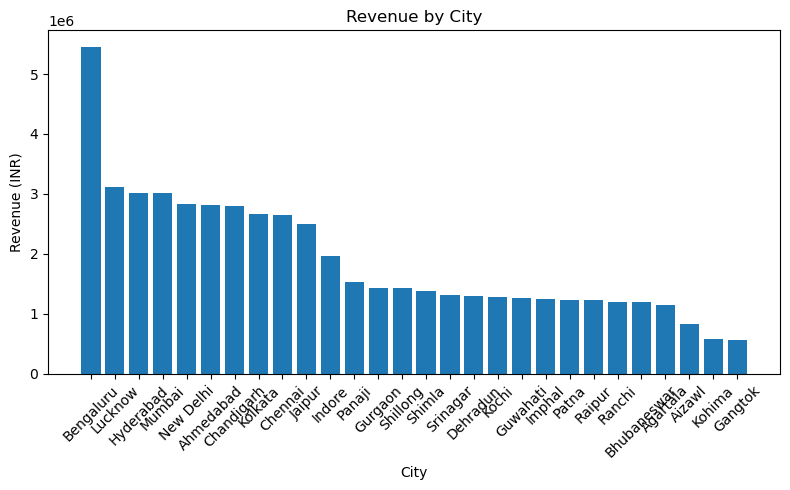

In [37]:
city_revenue = (
    df.groupby("City")["Price (INR)"]
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
plt.bar(city_revenue.index, city_revenue.values)

plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Revenue (INR)")
plt.title("Revenue by City")
plt.tight_layout()
plt.show()

#### Insights

• The top city contributes the highest share of revenue.\
• Revenue is concentrated in specific metropolitan regions.\
• Expansion strategy can focus on mid-performing cities.

### Monthly Sales Trend

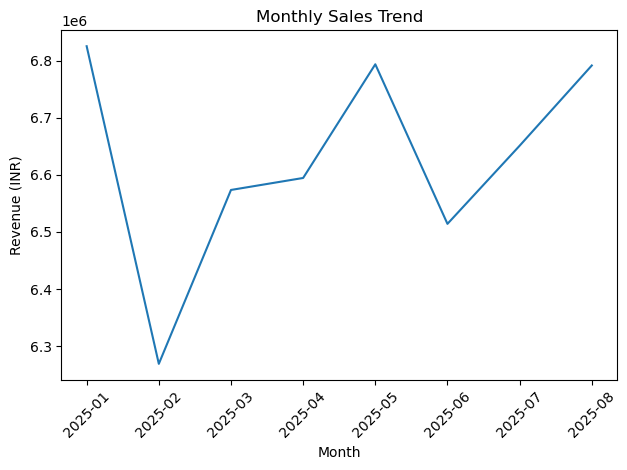

In [35]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

df["YearMonth"]  = df["Order Date"].dt.to_period("M").astype(str)

monthly_revenue  = df.groupby("YearMonth")["Price (INR)"].sum().reset_index()

plt.figure()
plt.plot(monthly_revenue["YearMonth"], monthly_revenue["Price (INR)"])
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Revenue (INR)")
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.show()

### Revenue Distribution by Day of Week

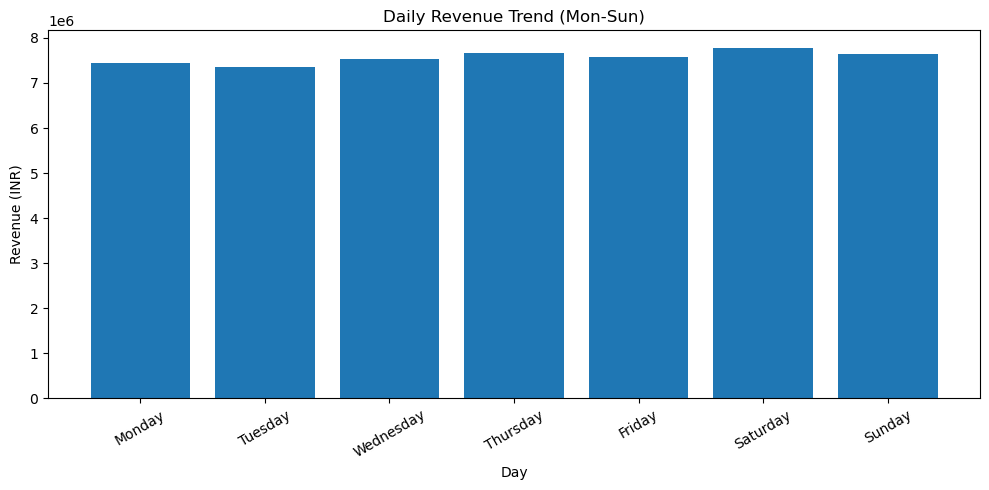

In [39]:
df ["DayName"]= pd.to_datetime(df ["Order Date"]).dt.day_name()
daily_revenue = (df.groupby("DayName") ["Price (INR)"]
    .sum()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
)
plt.figure(figsize=(10,5))
plt.bar(daily_revenue.index, daily_revenue.values)

plt.title("Daily Revenue Trend (Mon-Sun)")
plt.xlabel("Day")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

##### Insight:

• Revenue is significantly higher on weekends, indicating strong leisure-driven customer demand.  
• Weekdays generate comparatively lower revenue, showing scope for targeted mid-week promotions.  
• A consistent weekly revenue pattern suggests predictable customer behavior.  
• This pattern supports better demand forecasting, staffing optimization, and inventory planning.  

#### Strategic Recommendation:

• Increase staffing and inventory allocation on peak revenue days.  
• Launch weekday discount campaigns to improve mid-week sales performance.  
• Use weekend demand insights to plan special offers and bundled promotions.


### Revenue by City

In [41]:
non_veg_keywords = [
    "chicken", "egg", "fish", "mutton",
    "prawn", "biryani", "kabab", "kebab",
    "non-veg", "non veg"
]
df ["Food Category"] = np.where(
    df["Dish Name"].str.lower().str.contains("|".join(non_veg_keywords), na=False),
    "Non-Veg",
    "Veg"
)

In [42]:
food_revenue = (
    df.groupby("Food Category")["Price (INR)"]
    .sum()
    .reset_index()
)

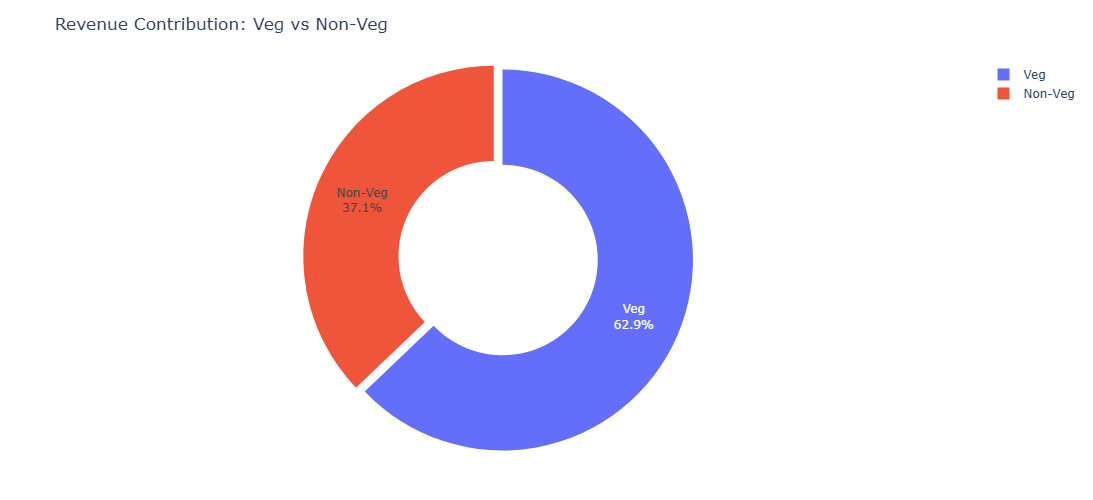

In [52]:
fig = px.pie(
    food_revenue,
    values="Price (INR)",
    names="Food Category",
    hole=0.5,
    title="Revenue Contribution: Veg vs Non-Veg",
)


fig.update_traces(
    textinfo="percent+label",
    pull=[0.05, 0]
)

fig.update_layout(
    height=500,
    margin=dict(t=60, b=40, l=40, r=40)
)

fig.show()

#### Insight:

• Non-Veg category contributes a larger share of total revenue, indicating higher customer preference for protein-based dishes.  
• Veg category still holds a significant revenue portion, showing balanced demand across dietary preferences.  
• Revenue contribution suggests menu optimization opportunities based on top-performing category.  
• Marketing campaigns and combo offers can be aligned with the dominant food category to maximize profitability.  

Strategic Recommendation:

• Expand high-performing category with premium and combo offerings.  
• Introduce targeted promotions to boost the lower-performing category.  
• Analyze top-selling dishes within each category for deeper profitability insights.


### Total Sales by State

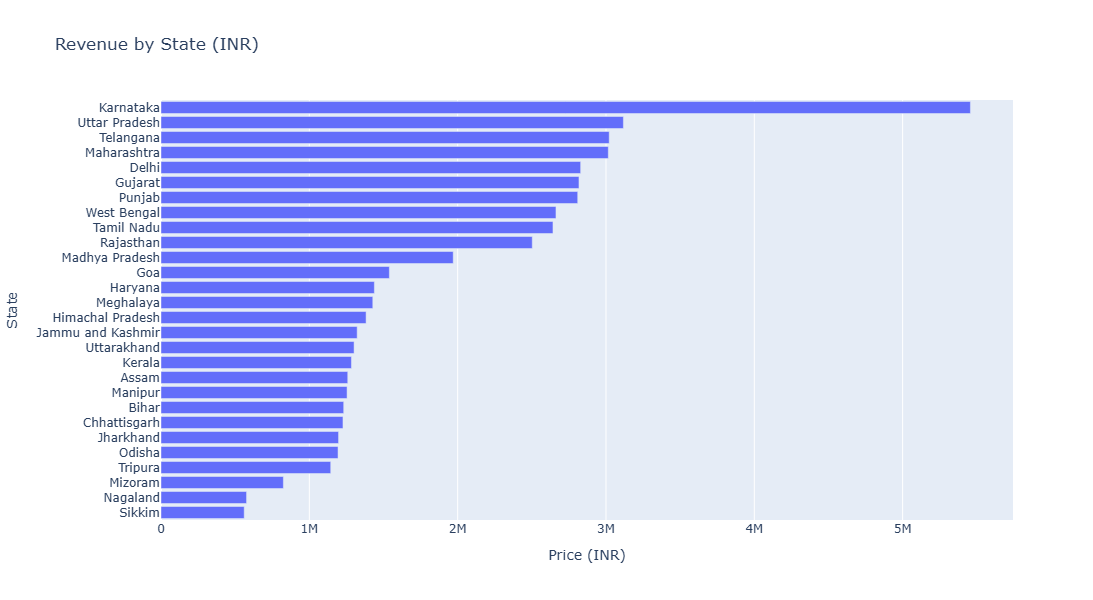

In [9]:
fig = px.bar(
    df.groupby("State", as_index=False) ["Price (INR)"].sum()
        .sort_values("Price (INR)", ascending=False),
    x="Price (INR)",
    y="State",
    orientation="h",
    title="Revenue by State (INR)"
)

fig.update_layout (height=600, yaxis = dict(autorange="reversed"))
fig.show()

Insight:

- Revenue is concentrated in a few top-performing states, indicating strong regional market dominance.
- The highest revenue-generating state significantly outperforms others, suggesting higher demand or better market penetration.
- Lower-performing states represent potential growth opportunities through targeted marketing and expansion strategies.
- Geographic revenue distribution helps identify where operational focus and promotional efforts should be intensified.


### Strategic Recommendation:

- Strengthen presence and premium offerings in top-performing states.
- Launch targeted campaigns and localized promotions in underperforming states.
- Analyze customer behavior in high-revenue states to replicate success strategies elsewhere.
`


### Quaterly Performance Summary

In [11]:
df ["Order_Date"] = pd.to_datetime(df["Order Date"])
df ["Quarter"] = df ["Order_Date"].dt.to_period("Q").astype(str)
quarterly_summary = (
df.groupby("Quarter", as_index=False)
.agg(
Total_Sales=("Price (INR)", "sum"),
Avg_Rating=("Rating", "mean"),
Total_Orders=("Order_Date", "count")
)
.sort_values("Quarter")
)
# quarterly_summary ["Total_Sales"] = quarterly_summary["Total_Sales"].round(0)
# quarterly_summary ["Avg_Rating"] = quarterly_summary ["Avg_Rating"].round(2)
quarterly_summary

,Quarter,Total_Sales,Avg_Rating,Total_Orders
0,2025Q1,19667821.77,4.342643,73096
1,2025Q2,19902256.59,4.340011,74163
2,2025Q3,13442427.41,4.342359,50171


#### Insights:

- Quarterly sales trends help identify seasonal revenue fluctuations.
- Changes in total orders indicate shifts in customer demand across quarters.
- Average rating consistency reflects service quality stability.
- A quarter with high sales and high ratings indicates strong overall performance.
- Lower-performing quarters may require targeted promotional or operational improvements.


### Top 5 Cities by Sales

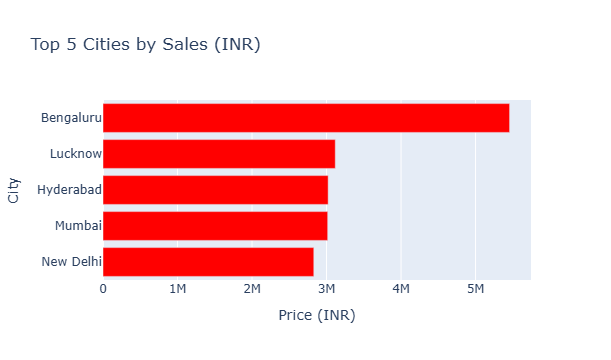

In [13]:
top_5_cities = (
    df.groupby("City") ["Price (INR)"]
    .sum()
        .nlargest (5)
        .sort_values()
        .reset_index()
)
fig = px.bar(
    top_5_cities,
    x="Price (INR)",
    y="City",
    orientation="h",
    title="Top 5 Cities by Sales (INR)",
    color_discrete_sequence=["red"]
)

fig.show()

#### Insight:

- The top 5 cities contribute a significant portion of total revenue, indicating strong urban market dominance.
- The highest-performing city leads in sales, showing higher customer demand and better market penetration.
- Revenue concentration in major cities suggests strong brand presence in metropolitan areas.
- Smaller cities outside the top 5 present potential expansion and growth opportunities.

### Strategic Recommendation:

- Strengthen premium offerings and loyalty programs in top-performing cities.
- Replicate successful marketing strategies from leading cities to emerging markets.
- Invest in targeted promotions and partnerships to improve sales in lower-performing regions.


## Final Business Summary

- Revenue analysis shows strong contribution from specific cities and states, indicating geographic concentration.
- Weekend sales outperform weekdays, suggesting leisure-driven demand patterns.
- Non-Veg category contributes significantly to overall revenue, reflecting customer preference trends.
- Quarterly performance highlights seasonal fluctuations in sales and order volume.
- Customer ratings show a direct relationship between service quality and revenue generation.




## Conclusion

This project demonstrates end-to-end data analysis including data cleaning, feature engineering, KPI creation, and business visualization. 
The insights derived from the dataset help in understanding revenue drivers, customer behavior, and market performance trends. 
The analysis supports strategic planning and operational decision-making using data-driven methods.


### Tools Used
- Python
- Pandas
- NumPy
- Matplotlib
- Plotly
- Jupyter Notebook